In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
unif = pd.read_csv('../bench/bench_sklearn_vs_intel_rand_points.csv')
init = unif[unif['step']=='init'][['n_sample', 'n_feature', 'n_component', 'time']]

# pre init + full
skl_pf = unif[(unif['distrib']=='sklearn') & (unif['pre-init']=='y') & (unif['algo']=='full')]
skl_pf = skl_pf[['n_sample', 'n_feature', 'n_component', 'time']]
# no pre init + full
skl_nf = unif[(unif['distrib']=='sklearn') & (unif['pre-init']=='n') & (unif['algo']=='full')]
skl_nf = skl_nf[['n_sample', 'n_feature', 'n_component', 'time']]

# pre init + elkan
skl_pe = unif[(unif['distrib']=='sklearn') & (unif['pre-init']=='y') & (unif['algo']=='elkan')]
skl_pe = skl_pe[['n_sample', 'n_feature', 'n_component', 'time']]
# no pre init + elkan
skl_ne = unif[(unif['distrib']=='sklearn') & (unif['pre-init']=='n') & (unif['algo']=='elkan')]
skl_ne = skl_ne[['n_sample', 'n_feature', 'n_component', 'time']]
print(skl_ne)

     n_sample  n_feature  n_component         time
4       10000          3           10     0.071890
13      10000          3          100     0.543538
22      10000          3         1000     4.755596
31      10000          3        10000     0.000000
40      10000         50           10     0.525704
49      10000         50          100     1.165665
58      10000         50         1000     5.331997
67      10000         50        10000     0.000000
76     100000          3           10     0.753924
85     100000          3          100    17.796621
94     100000          3         1000   161.009653
103    100000          3        10000   800.030789
112    100000         50           10     7.249839
121    100000         50          100    44.606929
130    100000         50         1000   154.785878
139    100000         50        10000   720.410009
148   1000000          3           10     5.810117
157   1000000          3          100   437.228761
166   1000000          3       

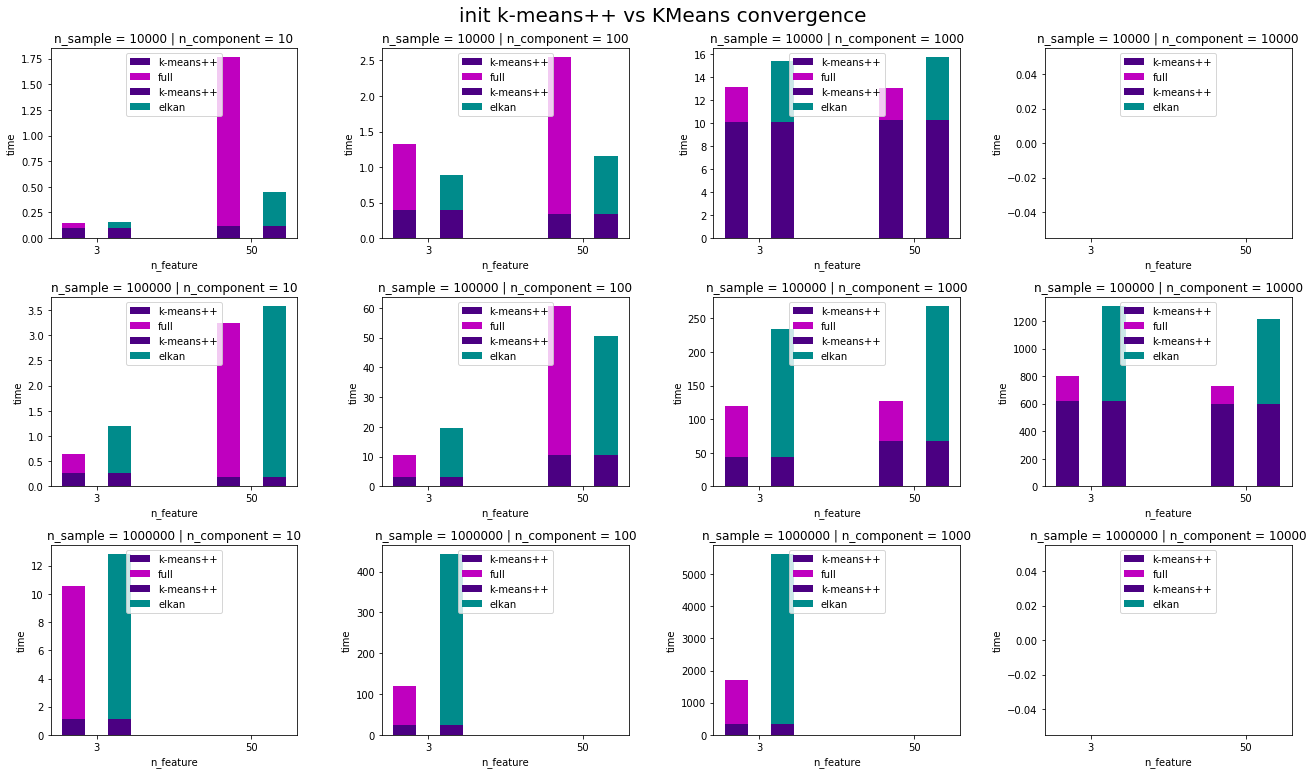

In [67]:
fig, ax = plt.subplots(3, 4)
width = 0.15
ind = np.array([1,2]) - 1.5*width

dinit = np.empty((3,4), dtype=object)
dpf = np.empty((3,4), dtype=object)
dnf = np.empty((3,4), dtype=object)
dpe = np.empty((3,4), dtype=object)
dne = np.empty((3,4), dtype=object)

for i, ns in enumerate([10000, 100000, 1000000]):
    for j, nc in enumerate([10, 100, 1000, 10000]):
        dinit[i,j] = np.array(init.loc[(init['n_sample']==ns) & (init['n_component']==nc)]['time'])
        dpf[i,j] = np.array(skl_pf.loc[(skl_pf['n_sample']==ns) & (skl_pf['n_component']==nc)]['time'])
        dnf[i,j] = np.array(skl_nf.loc[(skl_nf['n_sample']==ns) & (skl_nf['n_component']==nc)]['time'])
        dpe[i,j] = np.array(skl_pe.loc[(skl_pe['n_sample']==ns) & (skl_pe['n_component']==nc)]['time'])
        dne[i,j] = np.array(skl_ne.loc[(skl_ne['n_sample']==ns) & (skl_ne['n_component']==nc)]['time'])
        
        ax[i,j].bar(ind, dinit[i,j], width=width, color='indigo', align='edge'),
        ax[i,j].bar(ind, dpf[i,j], width=width, bottom=dinit[i,j], color='m', align='edge'),
        
        ax[i,j].bar(ind + 2*width, dinit[i,j], width=width, color='indigo', align='edge')
        ax[i,j].bar(ind + 2*width, dpe[i,j], width=width, bottom=dinit[i,j], color='darkcyan', align='edge')
         
        ax[i,j].set_ylabel('time')
        ax[i,j].set_xlabel('n_feature')
        ax[i,j].set_xticks(ind + 1.5*width)
        ax[i,j].set_xticklabels(('3', '50'))
        ax[i,j].legend(('k-means++', 'full', 'k-means++', 'elkan'), loc='upper center')
        s = 'n_sample = ' + str(ns) + ' | n_component = ' + str(nc)
        ax[i,j].set_title(s)
        
fig.set_size_inches(18.5, 10.5)
fig.suptitle('init k-means++ vs KMeans convergence', y=1.02, fontsize=20)
fig.tight_layout()
fig.savefig('../plots/kmpp_vs_kmeans.png')
plt.show()

In [71]:
blobs = pd.read_csv('../bench/bench_sklearn_vs_intel_blobs.csv')
init = blobs[blobs['step']=='init'][['n_sample', 'n_feature', 'n_component', 'time']]

# pre init + full
skl_pf = blobs[(blobs['distrib']=='sklearn') & (blobs['pre-init']=='y') & (blobs['algo']=='full')]
skl_pf = skl_pf[['n_sample', 'n_feature', 'n_component', 'time']]
# no pre init + full
skl_nf = blobs[(blobs['distrib']=='sklearn') & (blobs['pre-init']=='n') & (blobs['algo']=='full')]
skl_nf = skl_nf[['n_sample', 'n_feature', 'n_component', 'time']]

# pre init + elkan
skl_pe = blobs[(blobs['distrib']=='sklearn') & (blobs['pre-init']=='y') & (blobs['algo']=='elkan')]
skl_pe = skl_pe[['n_sample', 'n_feature', 'n_component', 'time']]
# no pre init + elkan
skl_ne = blobs[(blobs['distrib']=='sklearn') & (blobs['pre-init']=='n') & (blobs['algo']=='elkan')]
skl_ne = skl_ne[['n_sample', 'n_feature', 'n_component', 'time']]
print(skl_ne)

     n_sample  n_feature  n_component         time
4       10000          3           10     0.076805
13      10000          3          100     0.668059
22      10000          3         1000     6.975103
31      10000          3        10000     0.000000
40      10000         50           10     0.477120
49      10000         50          100     0.932371
58      10000         50         1000     8.251332
67      10000         50        10000     0.000000
76     100000          3           10     1.124173
85     100000          3          100    20.885168
94     100000          3         1000   246.936833
103    100000          3        10000   979.261708
112    100000         50           10     3.489370
121    100000         50          100    37.634930
130    100000         50         1000   200.203281
139    100000         50        10000  1166.967769
148   1000000          3           10     8.180466
157   1000000          3          100   432.868146
166   1000000          3       

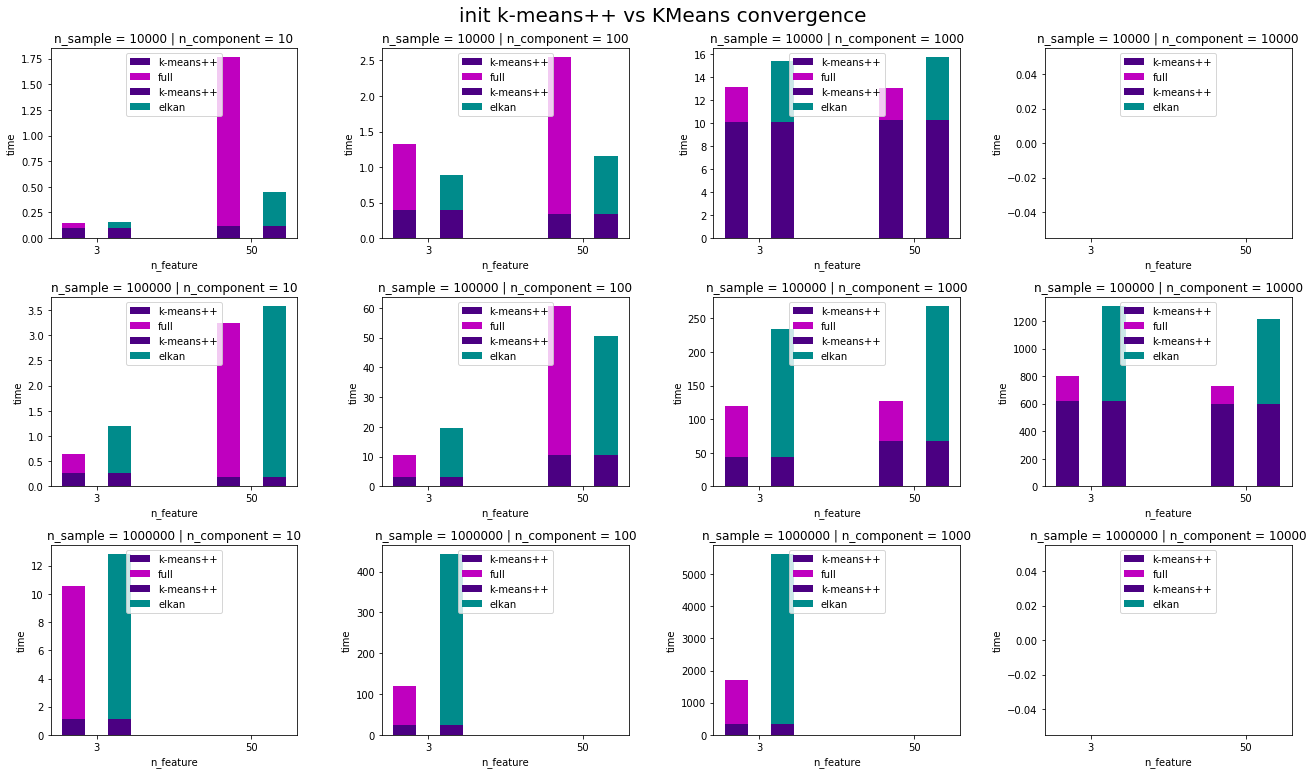

In [70]:
fig, ax = plt.subplots(3, 4)
width = 0.15
ind = np.array([1,2]) - 1.5*width

dinit = np.empty((3,4), dtype=object)
dpf = np.empty((3,4), dtype=object)
dnf = np.empty((3,4), dtype=object)
dpe = np.empty((3,4), dtype=object)
dne = np.empty((3,4), dtype=object)

for i, ns in enumerate([10000, 100000, 1000000]):
    for j, nc in enumerate([10, 100, 1000, 10000]):
        dinit[i,j] = np.array(init.loc[(init['n_sample']==ns) & (init['n_component']==nc)]['time'])
        dpf[i,j] = np.array(skl_pf.loc[(skl_pf['n_sample']==ns) & (skl_pf['n_component']==nc)]['time'])
        dnf[i,j] = np.array(skl_nf.loc[(skl_nf['n_sample']==ns) & (skl_nf['n_component']==nc)]['time'])
        dpe[i,j] = np.array(skl_pe.loc[(skl_pe['n_sample']==ns) & (skl_pe['n_component']==nc)]['time'])
        dne[i,j] = np.array(skl_ne.loc[(skl_ne['n_sample']==ns) & (skl_ne['n_component']==nc)]['time'])
        
        ax[i,j].bar(ind, dinit[i,j], width=width, color='indigo', align='edge'),
        ax[i,j].bar(ind, dpf[i,j], width=width, bottom=dinit[i,j], color='m', align='edge'),
        
        ax[i,j].bar(ind + 2*width, dinit[i,j], width=width, color='indigo', align='edge')
        ax[i,j].bar(ind + 2*width, dpe[i,j], width=width, bottom=dinit[i,j], color='darkcyan', align='edge')
         
        ax[i,j].set_ylabel('time')
        ax[i,j].set_xlabel('n_feature')
        ax[i,j].set_xticks(ind + 1.5*width)
        ax[i,j].set_xticklabels(('3', '50'))
        ax[i,j].legend(('k-means++', 'full', 'k-means++', 'elkan'), loc='upper center')
        s = 'n_sample = ' + str(ns) + ' | n_component = ' + str(nc)
        ax[i,j].set_title(s)
        
fig.set_size_inches(18.5, 10.5)
fig.suptitle('init k-means++ vs KMeans convergence', y=1.02, fontsize=20)
fig.tight_layout()
fig.savefig('../plots/kmpp_vs_kmeans_blobs.png')
plt.show()